In [4]:
# read nc output from WAOM 10km_CF run

import xarray as xr
import pandas as p
import numpy as  np
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import cmocean

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import pyresample

import gsw

from dask.distributed import Client
import logging
import warnings
warnings.filterwarnings('ignore')

In [5]:
client = Client(threads_per_worker=1, memory_limit=0, silence_logs=logging.ERROR)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36237,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:34673,Total threads: 1
Dashboard: /proxy/37189/status,Memory: 0 B
Nanny: tcp://127.0.0.1:40199,


In [6]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [7]:
# determine constants:
# rho0 = 1025 # kg. m-3
# Cp = 3989.245 # J.kg-1.degC-1
# Tf = -1.95 # degC

# use same values as access-om2-01
rho0 = 1035 # kg. m-3
Cp = 3992.1 # J.kg-1.degC-1



### load along contour variables:

In [8]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v4')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v3')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v3')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v4')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close() 

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_v3')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_v3')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_v3')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_v3')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [9]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v4')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v3')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v3')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v4') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_v3')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_v3')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_v3')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_v3')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 158 ms, sys: 70.7 ms, total: 228 ms
Wall time: 547 ms


In [10]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

#ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily_v4')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v3')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v3')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v4') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()


CPU times: user 116 ms, sys: 37.1 ms, total: 153 ms
Wall time: 414 ms


In [11]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v4')
heat_transport_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v3')
temp_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v3')
salt_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v4')
z_rho_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CF_v3')
dist_along_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CF_v3')
lon_along_10km_CF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CF_v3')
lat_along_10km_CF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CF_v3')
distance_indices_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [12]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v4')
heat_transport_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v3')
temp_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v3')
salt_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v4') 
z_rho_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CF_v3')
dist_along_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CF_v3')
lon_along_4km_CF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CF_v3')
lat_along_4km_CF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CF_v3')
distance_indices_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 184 ms, sys: 75.8 ms, total: 260 ms
Wall time: 715 ms


In [13]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v3')
ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_CF_daily_v4')
heat_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v3')
temp_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v3')
salt_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v4') 
z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()


CPU times: user 111 ms, sys: 54.3 ms, total: 166 ms
Wall time: 515 ms


In [14]:
## obtain area/distance:

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))

[dist_along_axis_10km_CF, Zaxis_10k_CFm] = np.meshgrid(dist_along_10km_CF, np.arange(0,31))
[dist_along_axis_4km_CF, Zaxis_4km_CF] = np.meshgrid(dist_along_4km_CF, np.arange(0,31))


In [15]:
# define fig path:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


In [16]:
# define density range:

# rho grid for binning:
rho_grid2=np.arange(36.2,37.4,0.025) # for sigma-2
len_rho_grid2=len(rho_grid2)


In [14]:
# # use salt and temp along the contour to calculate sigma:
sigma_2_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],2000) - 1000
sigma_2_4km = gsw.rho(salt_4km[:,:],temp_4km[:,:],2000) - 1000
sigma_2_4kmNT = gsw.rho(salt_4kmNT[:,:],temp_4kmNT[:,:],2000) - 1000

In [15]:
# same but for calving front (use salt and temp along the contour to calculate sigma):
sigma_2_10km_CF = gsw.rho(salt_10km_CF[:,:],temp_10km_CF[:,:],2000) - 1000
sigma_2_4km_CF = gsw.rho(salt_4km_CF[:,:],temp_4km_CF[:,:],2000) - 1000
sigma_2_4kmNT_CF = gsw.rho(salt_4kmNT_CF[:,:],temp_4kmNT_CF[:,:],2000) - 1000


In [16]:
# DEFINE coldest temp along contour:

Tf_10km = temp_10km.min().values
Tf_4km = temp_4km.min().values
Tf_4kmNT = temp_4kmNT.min().values

Tf_10km_CF = temp_10km_CF.min().values
Tf_4km_CF = temp_4km_CF.min().values
Tf_4kmNT_CF = temp_4kmNT_CF.min().values

print(Tf_10km, Tf_4km, Tf_4kmNT)
print(Tf_10km_CF, Tf_4km_CF, Tf_4kmNT_CF)

Tf = Tf_4kmNT # lowest of them all
print(Tf)

-2.850733518600464 -3.283663511276245 -3.534879684448242
-2.9521701335906982 -3.2196805477142334 -3.183741807937622
-3.534879684448242


### plot TS-diagram analyses to back-up density-binned HT:

In [17]:
## TS diagram to choose isoypcnals:
# print(sigma_2_10km.shape, temp_10km.shape, salt_10km.shape)


# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -4. + (0.1 * -4.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 5 + (0.1 * 5.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-4,5,ydim)
si = np.linspace(30,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],2000) # sigma-2000
# Substract 1000 to convert to sigma-2
dens = dens - 1000

tmin, tmax, smin, smax sizes=, -4.4 5.5 29.7 36.36


In [18]:
%%time
salt_10km.load()
temp_10km.load()
z_rho_10km.load()

CPU times: user 66.1 ms, sys: 359 ms, total: 425 ms
Wall time: 631 ms


<xarray.Variable (ocean_time: 365, s_rho: 31, contour_index_array: 2690)>
array([[[-1161.21483486, -1022.93124234, -1449.51016424, ...,
         -1380.05698252, -1300.12436344, -1178.23384055],
        [-1152.1263778 , -1014.34127471, -1439.45757842, ...,
         -1370.22904028, -1290.56057322, -1169.08563461],
        [-1138.51262959, -1001.85728516, -1423.55199514, ...,
         -1354.86886856, -1275.83316852, -1155.33398644],
        ...,
        [  -20.50348293,   -19.80557515,   -21.78475522, ...,
           -21.44090346,   -21.09422798,   -20.54438919],
        [  -12.39525094,   -12.05909312,   -12.99998944, ...,
           -12.81129959,   -12.64893029,   -12.39333665],
        [   -5.04359738,    -4.96364831,    -5.19377984, ...,
            -5.10662304,    -5.06693159,    -5.01192852]],

       [[-1161.21469188, -1022.93110344, -1449.51004071, ...,
         -1380.05701961, -1300.12440965, -1178.23387996],
        [-1152.12588831, -1014.34080545, -1439.45714439, ...,
         -1370.22916982, -1290.56073347, -1169.08576975],
        [-1138.51162104, -1001.85633577, -1423.55106982, ...,
         -1354.86914258, -1275.83350437, -1155.33426548],
...
        [  -20.46734122,   -19.77163855,   -21.74732112, ...,
           -21.41762504,   -21.07020803,   -20.51904895],
        [  -12.35885318,   -12.02489539,   -12.96232566, ...,
           -12.78787374,   -12.62475222,   -12.36781858],
        [   -5.00696745,    -4.92921139,    -5.15591194, ...,
            -5.08306557,    -5.04261156,    -4.9862494 ]],

       [[-1161.21471425, -1022.93112068, -1449.51005829, ...,
         -1380.05693081, -1300.12431333, -1178.23377558],
        [-1152.1259649 , -1014.34086371, -1439.45720614, ...,
         -1370.2288597 , -1290.56039947, -1169.08541182],
        [-1138.51177884, -1001.85645363, -1423.55120146, ...,
         -1354.86848656, -1275.83280436, -1155.33352642],
        ...,
        [  -20.46667509,   -19.77166337,   -21.7468235 , ...,
           -21.42303602,   -21.07764142,   -20.52435272],
        [  -12.35818233,   -12.0249204 ,   -12.96182499, ...,
           -12.79331899,   -12.63223454,   -12.37315956],
        [   -5.00629232,    -4.92923658,    -5.15540857, ...,
            -5.08854141,    -5.05013782,    -4.99162409]]])

In [17]:
%%time
salt_4km.load()
temp_4km.load()
z_rho_4km.load()

CPU times: user 819 ms, sys: 1.89 s, total: 2.71 s
Wall time: 4.69 s


<xarray.Variable (ocean_time: 365, s_rho: 31, contour_index_array: 7056)>
array([[[-1240.17746902, -1246.17210882, -1448.00234736, ...,
         -1357.07616039, -1356.07699329, -1374.06204698],
        [-1230.81687529, -1236.79112548, -1437.95508624, ...,
         -1347.32386614, -1346.32798246, -1364.25400643],
        [-1216.56896507, -1222.49527941, -1422.06208227, ...,
         -1332.1455829 , -1331.15759101, -1348.94157767],
        ...,
        [  -20.94712731,   -20.97619243,   -21.8467751 , ...,
           -21.38439929,   -21.37967305,   -21.45565986],
        [  -12.64517709,   -12.65981942,   -13.0657626 , ...,
           -12.80743061,   -12.80498957,   -12.83992697],
        [   -5.16033191,    -5.16515686,    -5.26209338, ...,
            -5.13762702,    -5.13670071,    -5.14446665]],

       [[-1240.17727774, -1246.17191095, -1448.00217668, ...,
         -1357.07623374, -1356.07706869, -1374.06212323],
        [-1230.81621562, -1236.79044268, -1437.9544866 , ...,
         -1347.32412178, -1346.32824524, -1364.25427258],
        [-1216.56759245, -1222.49385763, -1422.06080408, ...,
         -1332.14612225, -1331.15814536, -1348.94214029],
...
        [  -20.90188301,   -20.93335721,   -21.80141694, ...,
           -21.38905008,   -21.38360368,   -21.45927203],
        [  -12.59962568,   -12.61669434,   -13.02012595, ...,
           -12.81211118,   -12.80894537,   -12.84356208],
        [   -5.11450362,    -5.12177057,    -5.21620923, ...,
            -5.14233421,    -5.14067903,    -5.14812226]],

       [[-1240.17732895, -1246.17197643, -1448.00222246, ...,
         -1357.0761936 , -1356.07702476, -1374.06207731],
        [-1230.81639221, -1236.79066864, -1437.95464743, ...,
         -1347.32398187, -1346.32809212, -1364.2541123 ],
        [-1216.56795989, -1222.49432813, -1422.06114691, ...,
         -1332.14582706, -1331.15782234, -1348.94180148],
        ...,
        [  -20.9023101 ,   -20.93368538,   -21.80209217, ...,
           -21.39573509,   -21.39040964,   -21.46610795],
        [  -12.60005567,   -12.61702473,   -13.02080533, ...,
           -12.81883899,   -12.81579494,   -12.85044141],
        [   -5.11493621,    -5.12210296,    -5.21689229, ...,
            -5.14910031,    -5.14756758,    -5.15504036]]])

In [20]:
%%time
salt_4kmNT.load()
temp_4kmNT.load()
z_rho_4kmNT.load()

CPU times: user 161 ms, sys: 926 ms, total: 1.09 s
Wall time: 1.65 s


<xarray.Variable (ocean_time: 365, s_rho: 31, contour_index_array: 7056)>
array([[[-1240.17732118, -1246.17196714, -1448.00221536, ...,
         -1357.07620693, -1356.07703977, -1374.06209324],
        [-1230.81636542, -1236.79063659, -1437.95462249, ...,
         -1347.32402834, -1346.32814442, -1364.25416793],
        [-1216.56790414, -1222.4942614 , -1422.06109375, ...,
         -1332.14592511, -1331.15793267, -1348.94191906],
        ...,
        [  -20.89982422,   -20.93070348,   -21.79955253, ...,
           -21.4002872 ,   -21.39553006,   -21.47159717],
        [  -12.59755292,   -12.61402266,   -13.01825009, ...,
           -12.82342024,   -12.82094816,   -12.8559655 ],
        [   -5.11241825,    -5.1190827 ,    -5.2143232 , ...,
            -5.15370762,    -5.15275013,    -5.16059559]],

       [[-1240.17731521, -1246.17196467, -1448.00220937, ...,
         -1357.07621157, -1356.077045  , -1374.06209898],
        [-1230.81634482, -1236.79062808, -1437.95460146, ...,
         -1347.3240445 , -1346.32816265, -1364.25418793],
        [-1216.56786128, -1222.49424368, -1422.06104891, ...,
         -1332.14595921, -1331.15797113, -1348.94196135],
...
        [  -20.90655842,   -20.93789848,   -21.80484294, ...,
           -21.39261221,   -21.3875679 ,   -21.4635263 ],
        [  -12.60433283,   -12.62126634,   -13.02357298, ...,
           -12.81569611,   -12.81293499,   -12.84784337],
        [   -5.11923937,    -5.12637026,    -5.21967496, ...,
            -5.14593955,    -5.14469136,    -5.15242767]],

       [[-1240.17734238, -1246.17198972, -1448.0022309 , ...,
         -1357.07620406, -1356.07703665, -1374.06209005],
        [-1230.81643854, -1236.7907145 , -1437.95467709, ...,
         -1347.32401835, -1346.32813357, -1364.25415676],
        [-1216.56805629, -1222.49442363, -1422.06121014, ...,
         -1332.14590403, -1331.15790978, -1348.94189546],
        ...,
        [  -20.90660806,   -20.93795282,   -21.80511261, ...,
           -21.3993085 ,   -21.39446761,   -21.47049533],
        [  -12.60438281,   -12.62132105,   -13.02384431, ...,
           -12.82243528,   -12.8198789 ,   -12.85485666],
        [   -5.11928966,    -5.1264253 ,    -5.21994776, ...,
            -5.15271705,    -5.15167479,    -5.1594805 ]]])

In [ ]:
%%time

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (12, 6))
# normal isopycnals
for aa in range(0,2):
    for bb in range(0,3):
        CS1 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
        CS2 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.7,36.71),linestyles='dashed', colors='cyan', linewidth=0.1)
        CS3 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.9,36.91),linestyles='dashed', colors='deepskyblue', linewidth=0.1)
        CS4 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.,37.01),linestyles='dashed', colors='blue', linewidth=0.1)
        CS5 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.3,37.31),linestyles='dashed', colors='navy', linewidth=0.1)
        ax[aa,bb].set_xlim([33.2,35])
        ax[aa,bb].set_ylim([-3,2])
        ax[aa,bb].set_ylabel('Temperature')
        ax[aa,bb].set_xlabel('Salinity')

c = ax[0,0].scatter(salt_10km.mean('ocean_time'),temp_10km.mean('ocean_time'),
                 c=-z_rho_10km.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,1].scatter(salt_4km.mean('ocean_time'),temp_4km.mean('ocean_time'),
                 c=-z_rho_4km.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,2].scatter(salt_4kmNT.mean('ocean_time'),temp_4kmNT.mean('ocean_time'),
                 c=-z_rho_4kmNT.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,0].scatter(salt_10km_CF.mean('ocean_time'),temp_10km_CF.mean('ocean_time'),
                 c=-z_rho_10km_CF.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km_CF.mean('ocean_time'),temp_4km_CF.mean('ocean_time'),
                 c=-z_rho_4km_CF.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT_CF.mean('ocean_time'),temp_4kmNT_CF.mean('ocean_time'),
                 c=-z_rho_4kmNT_CF.mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

cbar_ax1 = fig.add_axes([0.915, 0.12,  0.01, 0.75])
fig.colorbar(c, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')#, labelpad=-35)

# 
plt.savefig(fig_path + 'WAOM10x4x4NT_Along-1500m_CF_TSdiags_annual.png', bbox_inches='tight', dpi=300)
# plt.savefig(fig_path + 'WAOM10x4x4NT_Along-1500m_TSdiags.png', bbox_inches='tight', dpi=300)
# plt.savefig(fig_path + 'WAOM10x4x4NT_Along-CF_TSdiags.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%time

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (12, 6))
# normal isopycnals
for aa in range(0,2):
    for bb in range(0,3):
        CS1 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
        # CS2 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        # ax[aa,bb].clabel(CS2, CS2.levels, inline=True, fontsize=10)
        ax[aa,bb].set_xlim([33.2,35])
        ax[aa,bb].set_ylim([-3,2])
        ax[aa,bb].set_ylabel('Temperature')
        ax[aa,bb].set_xlabel('Salinity')

# c = ax[0,0].scatter(salt_10km,temp_10km,
#                  c=-z_rho_10km,marker="p", s=(72./fig.dpi)**2, 
#                  label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
# c = ax[0,1].scatter(salt_4km,temp_4km,
#                  c=-z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
#                  label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
# c = ax[0,2].scatter(salt_4kmNT,temp_4kmNT,
#                  c=-z_rho_4kmNT,marker="p", s=(72./fig.dpi)**2, 
#                  label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,0].scatter(salt_10km_CF,temp_10km_CF,
                 c=-z_rho_10km_CF,marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km_CF,temp_4km_CF,
                 c=-z_rho_4km_CF,marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT_CF,temp_4kmNT_CF,
                 c=-z_rho_4kmNT_CF,marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

cbar_ax1 = fig.add_axes([0.91, 0.12,  0.01, 0.75])
fig.colorbar(c, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')#, labelpad=-35)

# 
# plt.savefig(fig_path + 'WAOM10x4x4NT_Along-1500m_CF_TSdiags.png', bbox_inches='tight', dpi=300)
# plt.savefig(fig_path + 'WAOM10x4x4NT_Along-1500m_TSdiags.png', bbox_inches='tight', dpi=300)
plt.savefig(fig_path + 'WAOM10x4x4NT_Along-CF_TSdiags.png', bbox_inches='tight', dpi=300)
plt.show()

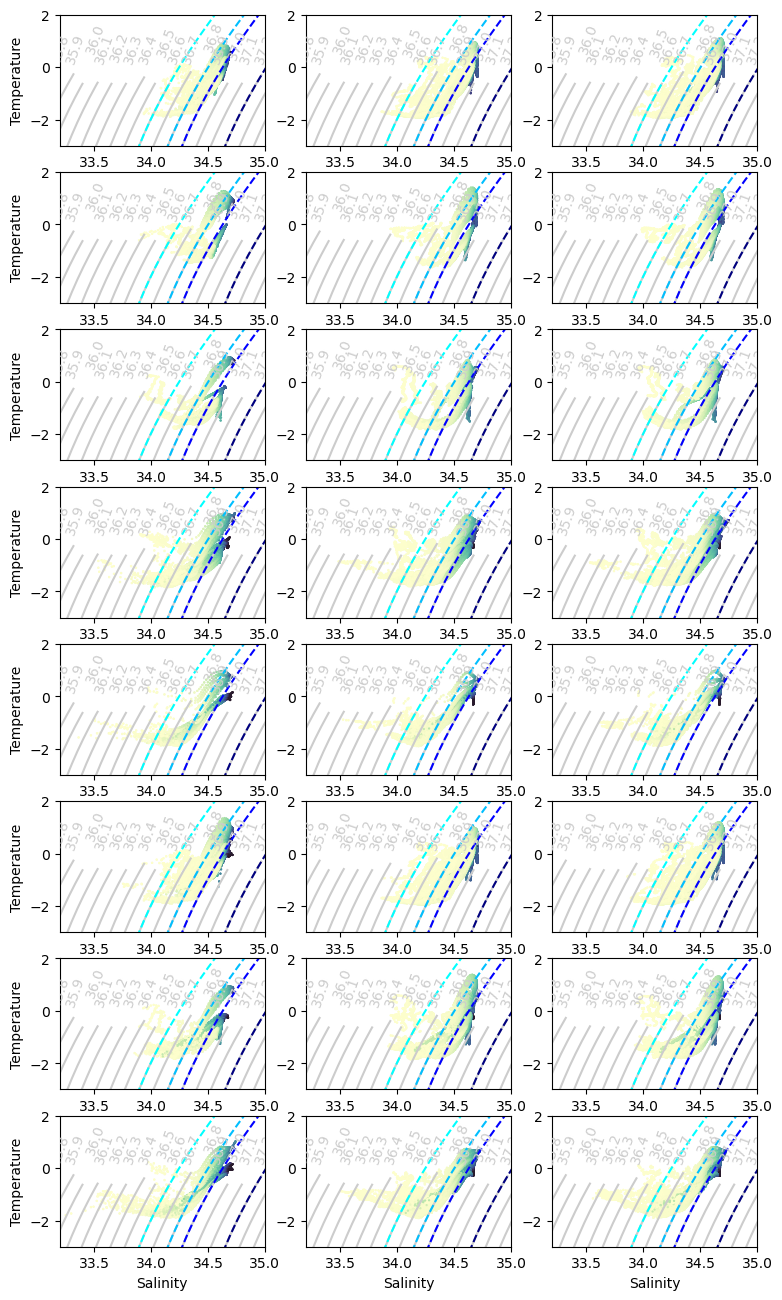

CPU times: user 1min 15s, sys: 30.4 s, total: 1min 45s
Wall time: 1min 29s
Parser   : 452 ms


In [63]:
%%time

fig, ax = plt.subplots(nrows=8, ncols=3, figsize = (9, 16))
# normal isopycnals
for aa in range(0,8):
    for bb in range(0,3):
        CS1 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
        CS2 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.7,36.71),linestyles='dashed', colors='cyan', linewidth=0.1)
        CS3 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.9,36.91),linestyles='dashed', colors='deepskyblue', linewidth=0.1)
        CS4 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.,37.01),linestyles='dashed', colors='blue', linewidth=0.1)
        CS5 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.3,37.31),linestyles='dashed', colors='navy', linewidth=0.1)
        # ax[aa,bb].clabel(CS2, CS2.levels, inline=True, fontsize=10)
        ax[aa,bb].set_xlim([33.2,35])
        ax[aa,bb].set_ylim([-3,2])
        if aa==7:
            ax[aa,bb].set_xlabel('Salinity')
        if bb==0:
            ax[aa,bb].set_ylabel('Temperature')

c = ax[0,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[0,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(0,390)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(0,1142)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(0,1142)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[1,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[1,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(391,650)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1143,1820)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[2,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[2,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(651,850)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(1821,2290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[3,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[3,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(851,1240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(2291,3330)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[4,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[4,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(1241,1360)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3331,3645)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[5,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[5,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(1361,2000)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(3646,5240)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[6,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[6,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(2001,2360)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(5241,6210)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[7,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[7,0].scatter(salt_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),temp_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),
                 c=-z_rho_10km.mean('ocean_time').isel(contour_index_array=slice(2361,2689)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,1].scatter(salt_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),temp_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),
                 c=-z_rho_4km.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,2].scatter(salt_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),temp_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),
                 c=-z_rho_4kmNT.mean('ocean_time').isel(contour_index_array=slice(6211,7055)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-1500m', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

plt.savefig(fig_path + 'WAOM10x4x4NT_Along-1500_TSdiags_subregions.png', bbox_inches='tight', dpi=300)
plt.show()

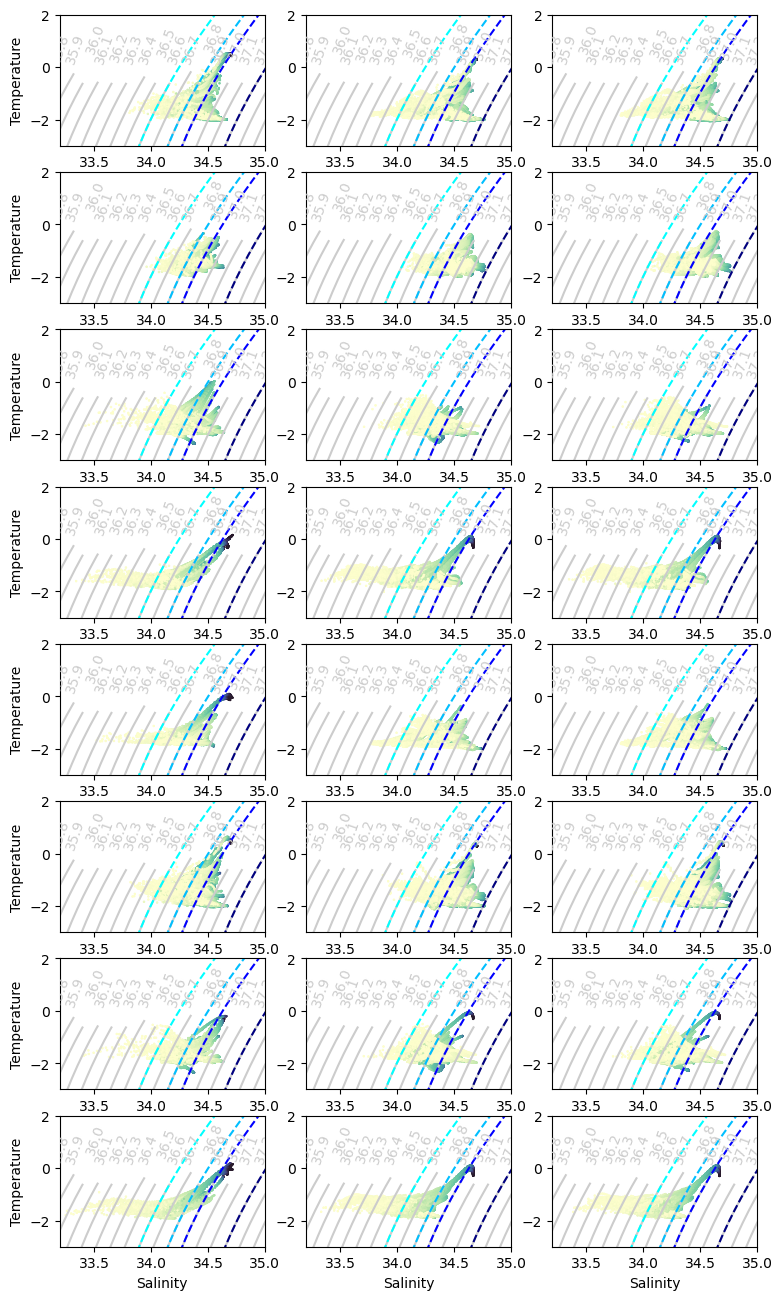

CPU times: user 1min 40s, sys: 36 s, total: 2min 16s
Wall time: 1min 57s


In [62]:
%%time

fig, ax = plt.subplots(nrows=8, ncols=3, figsize = (9, 16))
# normal isopycnals
for aa in range(0,8):
    for bb in range(0,3):
        CS1 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
        CS2 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.7,36.71),linestyles='dashed', colors='cyan', linewidth=0.1)
        CS3 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(36.9,36.91),linestyles='dashed', colors='deepskyblue', linewidth=0.1)
        CS4 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.,37.01),linestyles='dashed', colors='blue', linewidth=0.1)
        CS5 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.3,37.31),linestyles='dashed', colors='navy', linewidth=0.1)
        ax[aa,bb].set_xlim([33.2,35])
        ax[aa,bb].set_ylim([-3,2])
        if aa==7:
            ax[aa,bb].set_xlabel('Salinity')
        if bb==0:
            ax[aa,bb].set_ylabel('Temperature')

# ROS
c = ax[0,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[0,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(5,350)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[0,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(30,1020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# AMU
c = ax[1,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[1,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(351,730)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[1,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(1021,2020)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# BEL
c = ax[2,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[2,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(731,1220)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[2,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(2021,3290)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# EAP
c = ax[3,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[3,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1221,1600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[3,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(3291,4600)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# FRI
c = ax[4,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[4,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1601,1790)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[4,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(4601,5120)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# MAU
c = ax[5,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[5,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(1791,2515)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[5,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(5121,6960)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# PRY
c = ax[6,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[6,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2516,2940)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[6,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(6961,8150)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

# TOT
c = ax[7,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

c = ax[7,0].scatter(salt_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),temp_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),
                 c=-z_rho_10km_CF.mean('ocean_time').isel(contour_index_array=slice(2941,3297)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM10-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,1].scatter(salt_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),temp_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),
                 c=-z_rho_4km_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
c = ax[7,2].scatter(salt_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),temp_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),
                 c=-z_rho_4kmNT_CF.mean('ocean_time').isel(contour_index_array=slice(8151,9017)),marker="p", s=(72./fig.dpi)**2, 
                 label='WAOM4NT-CF', cmap=cmocean.cm.deep, vmin=0, vmax=2000)

plt.savefig(fig_path + 'WAOM10x4x4NT_Along-CF_TSdiags_subregions.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# plt.scatter(lon_along_10km[0:390],lat_along_10km[0:390], s=.2, alpha=.3, color='magenta',label='ROSS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[391:650],lat_along_10km[391:650], s=.2, alpha=.3, color='red',label='AMUDS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[651:850],lat_along_10km[651:850], s=.2, alpha=.3, color='lavenderblush',label='BELLS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[851:1240],lat_along_10km[851:1240], s=.2, alpha=.3, color='deeppink',label='EAP', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[1241:1360],lat_along_10km[1241:1360], s=.2, alpha=.3, color='darkgreen',label='FRIS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[1361:2000],lat_along_10km[1361:2000], s=.2, alpha=.3, color='limegreen',label='MAUD', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[2001:2360],lat_along_10km[2001:2360], s=.2, alpha=.3, color='aqua',label='PRY-SHA', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km[2361:2689],lat_along_10km[2361:2689], s=.2, alpha=.3, color='dodgerblue',label='TOT-MER', transform=ccrs.PlateCarree());
# # - calving front selection:
# plt.scatter(lon_along_10km_CF[5:350],lat_along_10km_CF[5:350], s=.2, alpha=.3, color='magenta', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[351:730],lat_along_10km_CF[351:730], s=.2, alpha=.3, color='red', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[731:1220],lat_along_10km_CF[731:1220], s=.2, alpha=.3, color='lavenderblush', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[1221:1600],lat_along_10km_CF[1221:1600], s=.2, alpha=.3, color='deeppink', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[1601:1790],lat_along_10km_CF[1601:1790], s=.2, alpha=.3, color='darkgreen', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[1791:2515],lat_along_10km_CF[1791:2515], s=.2, alpha=.3, color='limegreen', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[2516:2940],lat_along_10km_CF[2516:2940], s=.2, alpha=.3, color='aqua', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_10km_CF[2941:3297],lat_along_10km_CF[2941:3297], s=.2, alpha=.3, color='dodgerblue', transform=ccrs.PlateCarree());

# plt.scatter(lon_along_4km[0:1142],lat_along_4km[0:1142], s=1, alpha=1, color='red',label='ROSS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[1143,1820],lat_along_4km[1143,1820], s=1, alpha=1, color='purple',label='AMUDS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[1821:2290],lat_along_4km[1821:2290], s=1, alpha=1, color='orange',label='BELLS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[2291:3330],lat_along_4km[2291:3330], s=1, alpha=1, color='yellow',label='EAP', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[3331:3645],lat_along_4km[3331:3645], s=1, alpha=1, color='lime',label='FRIS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[3646:5240],lat_along_4km[3646:5240], s=1, alpha=1, color='green',label='MAUD', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[5241:6210],lat_along_4km[5241:6210], s=1, alpha=1, color='lightgreen',label='PRY-SHA', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km[6211:7055],lat_along_4km[6211:7055], s=1, alpha=1, color='blue',label='TOT-MER', transform=ccrs.PlateCarree());

# plt.scatter(lon_along_4km_CF[30:1020],lat_along_4km_CF[30:1020], s=1, alpha=1, color='red',label='ROSS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[1021:2020],lat_along_4km_CF[1021:2020], s=1, alpha=1, color='purple',label='AMUDS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[2021:3290],lat_along_4km_CF[2021:3290], s=1, alpha=1, color='orange',label='BELLS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[3291:4600],lat_along_4km_CF[3291:4600], s=1, alpha=1, color='yellow',label='EAP', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[4601:5120],lat_along_4km_CF[4601:5120], s=1, alpha=1, color='lime',label='FRIS', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[5121:6960],lat_along_4km_CF[5121:6960], s=1, alpha=1, color='green',label='MAUD', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[6961:8150],lat_along_4km_CF[6961:8150], s=1, alpha=1, color='lightgreen',label='PRY-SHA', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF[8151:9017],lat_along_4km_CF[8151:9017], s=1, alpha=1, color='blue',label='TOT-MER', transform=ccrs.PlateCarree());


In [ ]:
np.cumsum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:,:], axis=2),axis=1),axis=0))*1e-12

In [1]:

print('WAOM10 - 1500m')
Lmin=0
Lmax=390
print('Ross')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=391
Lmax=650
print('AMUDS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=651
Lmax=850
print('BELLS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)


Lmin=851
Lmax=1240
print('EAP')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1241
Lmax=1360
print('FRIS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1361
Lmax=2000
print('MAU')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=2001
Lmax=2360
print('EANT1')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=2360
Lmax=2689
print('EANT2')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

print('WAOM10 - Calving Front')
Lmin=5
Lmax=350
print('Ross')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=351
Lmax=730
print('AMUDS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=731
Lmax=1220
print('BELLS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1221
Lmax=1600
print('EAP')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1601
Lmax=1790
print('FRIS')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)

print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1381
Lmax=2515
print('MAU')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)


Lmin=2516
Lmax=2940
print('EANT1')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=2941
Lmax=3297
print('EANT2')
print('mean (TW) =',np.nansum((np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_10km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)


SyntaxError: invalid syntax (1384012641.py, line 5)

In [3]:
print('WAOM4 - 1500m')

Lmin=0
Lmax=1142
print('Ross')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1143
Lmax=1820
print('AMUDS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1821
Lmax=2290
print('BELLS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=2291
Lmax=3330
print('EAP')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=3331
Lmax=3645
print('FRIS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=3646
Lmax=5240
print('MAU')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=5241
Lmax=6210
print('EANT1')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=6211
Lmax=-1
print('EANT2')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

print('WAOM4 - Calving front')

Lmin=30
Lmax=1020
print('Ross')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=1021
Lmax=2020
print('AMUDS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=2021
Lmax=3290
print('BELLS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=3291
Lmax=4600
print('EAP')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=4601
Lmax=5120
print('FRIS')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=5121
Lmax=6960
print('MAU')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=6961
Lmax=8150
print('EANT1')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)

Lmin=8151
Lmax=9017
print('EANT2')
print('mean (TW) =',np.nansum(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[29:33,:,Lmin:Lmax], axis=2), axis=1),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.nansum(np.nansum(Eddy_HT_4km_CF_irho2[:,29:33,:Lmin:Lmax], axis=2),axis=1),axis=0),axis=-1)*1e-12)


WAOM4 - 1500m
Ross


NameError: name 'np' is not defined

In [ ]:
print('WAOM4-NOTIDE - 1500m')

Lmin=0
Lmax=1142
print('Ross')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=1143
Lmax=1820
print('AMUDS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=1821
Lmax=2290
print('BELLS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=2291
Lmax=3330
print('EAP')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=3331
Lmax=3645
print('FRIS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=3646
Lmax=5240
print('MAU')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=5241
Lmax=6210
print('EANT1')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=6211
Lmax=7055
print('EANT2')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

print('WAOM4-NOTIDE - Calving front')

Lmin=30
Lmax=1020
print('Ross')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=1021
Lmax=2020
print('AMUDS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)


Lmin=2021
Lmax=3290
print('BELLS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)


Lmin=3291
Lmax=4600
print('EAP')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)


Lmin=4601
Lmax=5120
print('FRIS')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)


Lmin=5121
Lmax=6960
print('MAU')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

Lmin=6961
Lmax=8150
print('EANT1')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)


Lmin=8151
Lmax=9017
print('EANT2')
print('total (TW) =',np.nansum(np.nanmean(np.sum(heat_transport_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)
print('mean (TW) =',np.nansum(np.sum(Mean_transp_4kmNT_CF[:,Lmin:Lmax],axis=0),axis=-1)*1e-12)
print('eddy (TW) =',np.nansum(np.nanmean(np.sum(Eddy_transp_4kmNT_CF[:,:,Lmin:Lmax], axis=1),axis=0),axis=-1)*1e-12)

